## Libraries

In [10]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [6]:
fish = pd.read_csv("LakeOntarioNearshore_FishConsumption.csv")

## Fish Consumption

In [21]:
fish1 = fish[['RegionalUnitID','Species_1','AvgMeals_sp1','Contaminant_sp1','x_centroid','y_centroid']]
fish1 = fish1.rename(columns={'Species_1': 'Species', 'AvgMeals_sp1': 'AvgMeals', 'Contaminant_sp1': 'Contaminant'})
fish2 = fish[['RegionalUnitID','Species_2','AvgMeals_sp2','Contaminant_sp2','x_centroid','y_centroid']]
fish2 = fish2.rename(columns={'Species_2': 'Species', 'AvgMeals_sp2': 'AvgMeals', 'Contaminant_sp2': 'Contaminant'})
fish3 = fish[['RegionalUnitID','Species_3','AvgMeals_sp3','Contaminant_sp3','x_centroid','y_centroid']]
fish3 = fish3.rename(columns={'Species_3': 'Species', 'AvgMeals_sp3': 'AvgMeals', 'Contaminant_sp3': 'Contaminant'})
new_fish = pd.concat([fish1, fish2, fish3]).reset_index(drop=True)
new_fish.loc[new_fish['AvgMeals'] < 0, 'AvgMeals'] = 0

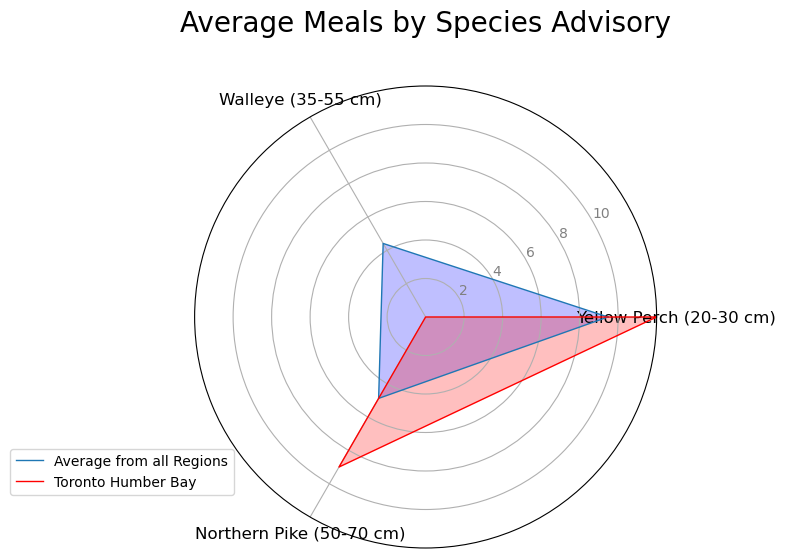

In [49]:
# Group by species and calculate the mean of AvgMeals
grouped_fish = new_fish.groupby('Species')['AvgMeals'].mean().reset_index()
grouped_fish = grouped_fish.sort_values(by='Species', ascending=False)

humber = new_fish.loc[new_fish['RegionalUnitID'] == 'LO05']
humber = humber[['Species','AvgMeals']]
humber = humber.sort_values(by='Species', ascending=False)

# Define the radar plot function
def create_radar_plot(grouped_fish):
    num_vars = len(grouped_fish)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], grouped_fish['Species'], color='black', size=12)

    ax.set_rlabel_position(30)
    plt.yticks([2,4,6,8,10], ['2', '4', '6','8','10'], color='grey', size=10)
    plt.ylim(0, 12)

    values = grouped_fish['AvgMeals'].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Average from all Regions')
    ax.fill(angles, values, 'b', alpha=0.25)

    values = humber['AvgMeals'].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Toronto Humber Bay', color='r')
    ax.fill(angles, values, 'r', alpha=0.25)

    plt.legend(loc='lower right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Average Meals by Species Advisory', size=20, color='black', y=1.1)
    plt.show()

# Call the radar plot function with the grouped data
create_radar_plot(grouped_fish)

In [40]:
zero_fish = new_fish[new_fish['AvgMeals'] == 0]
zero_fish['Contaminant'].fillna('no specified contaminant', inplace=True)

zero_fish['Species_no_brackets'] = zero_fish['Species'].str.replace(r'\s*\([^)]*\)', '')
zero_fish['Species + Contaminant'] = zero_fish['Species_no_brackets'] + ', ' + zero_fish['Contaminant']

# Drop the temporary 'Species_no_brackets' column
zero_fish.drop('Species_no_brackets', axis=1, inplace=True)

C:\Users\aarut\AppData\Local\Temp\ipykernel_23884\3993973318.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aarut\AppData\Local\Temp\ipykernel_23884\3993973318.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\aarut\AppData\Local\Temp\ipykernel_23884\3993973318.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aarut\AppData\Local\Temp\ipykernel_23884\3993973318.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [35]:
fig = px.scatter_mapbox(zero_fish, lat='y_centroid', lon='x_centroid', 
                        text="RegionalUnitID", color='Species + Contaminant',
                        zoom=7, height=400)
fig.update_layout(mapbox_style="carto-positron", title='Regions with Advisory being 0', title_x=0.5)
fig.update_traces(marker=dict(size=8))

fig.show()